<a href="https://colab.research.google.com/github/Seethagv/FDP_ASIET/blob/main/DAY_4_FDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

**Setup a Deep neural network with 2 hidden layers**

In [92]:
import tensorflow as tf

**download MNIST data set**
MNIST data set contains only digits

In [91]:
mnist_data = tf.keras.datasets.mnist

In [93]:
#set train and test
(X_train, y_train),(X_test, y_test) = mnist_data.load_data()

In [94]:
X_train.shape
#contains images 60K with size 28x28pixels

(60000, 28, 28)

In [95]:
y_train[0]
# 5 is the first image in y train set or image 5 is stored in the location Y[0]


5

In [96]:
y_train[6]

1

In [97]:
import matplotlib.pyplot as plt

X train gives the image of the didgit,if it is on imshow(X_train(0)) gives colour value, if cmap is there gives black and white image

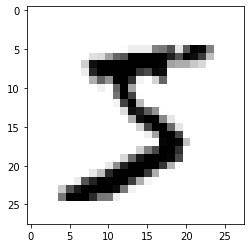

In [98]:
plt.imshow(X_train[0], cmap="binary")

In [99]:
y_train[4]

9

seaborn to see pixel size(0-255)
if annot is False , there is no pixel value

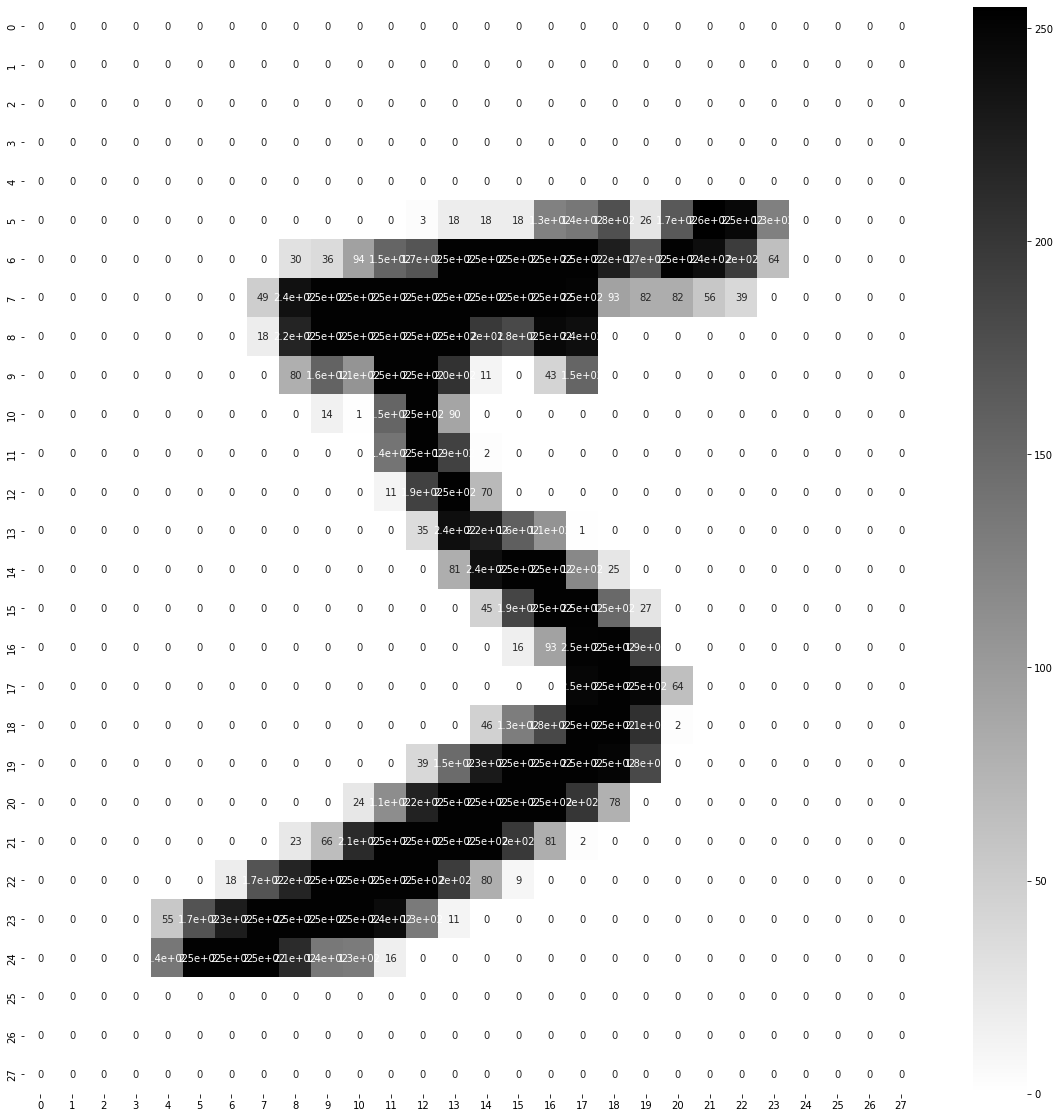

In [100]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(X_train[0], annot=True,cmap='binary')


y train give the digit value of image of corresponding (xtrain)

**Scaling of data**

In [101]:
#convert in to 0 and 1 values by dividing 255
X_train = X_train/255
X_test = X_test/255

In [102]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [103]:
#5000images withs 28x28pixel size
X_valid.shape
y_valid.shape

(5000,)

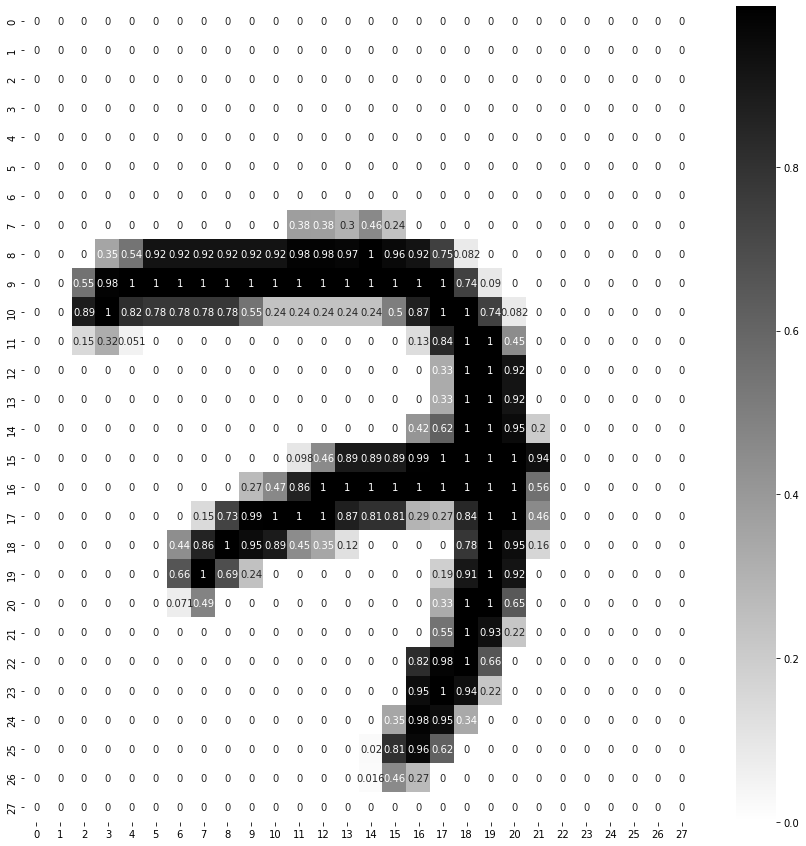

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True,cmap='binary')

**Create layers**

In [105]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu', name='hiddenlayer1'),
        tf.keras.layers.Dense(100,activation='relu', name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax', name='outputlayer')]

**Create a Model**

In [106]:
model1=tf.keras.models.Sequential(Layers)

input image size 28x28 =784
300 neurons in HL1
100 in HL2
10 in OP layer
no.of weights and bias is param #
(784x300)+300(bias value) =235500-HL1
(300x100)+100 = 30100 -HL2
(100x10)+10 = 1010 -OP layer


In [107]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Loss function optimer and matrix
Cross entropy for cross function verification

In [108]:
LOSS_FUNCTION ="sparse_categorical_crossentropy"
OPTIMIZER="adam"
Metrics=["accuracy"]

**COMPLIE MODEL**

In [109]:
model1.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER,metrics=Metrics)

In [110]:
model1.layers

to display individual layer in the model

In [111]:
model1.layers[0]

In [112]:
model1.layers[0].name

'inputlayer'

In [113]:
model1.layers[3]

In [114]:
model1.layers[2].name

'hiddenlayer2'

To access thw weight and bias

In [115]:
hidden1=model1.layers[1]
w,b =hidden1.get_weights()
w


array([[-0.07203852,  0.00110548,  0.03580466, ..., -0.04218425,
         0.00166156, -0.03178441],
       [-0.00584189, -0.05393936, -0.05442481, ..., -0.05105598,
        -0.01146018,  0.02207116],
       [ 0.07431692, -0.07405373,  0.00358736, ...,  0.01618306,
         0.05934936, -0.04534533],
       ...,
       [ 0.06163649,  0.01803695,  0.04167381, ...,  0.06025566,
         0.00368637,  0.03154583],
       [ 0.06372324, -0.00777076,  0.03724213, ...,  0.01943086,
        -0.07359008, -0.0490863 ],
       [ 0.00767246,  0.06047042,  0.037766  , ..., -0.01980657,
         0.06817622,  0.06870118]], dtype=float32)

In [117]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [116]:
hidden2=model1.layers[2]
w,b =hidden1.get_weights()

In [118]:
w

array([[-0.07203852,  0.00110548,  0.03580466, ..., -0.04218425,
         0.00166156, -0.03178441],
       [-0.00584189, -0.05393936, -0.05442481, ..., -0.05105598,
        -0.01146018,  0.02207116],
       [ 0.07431692, -0.07405373,  0.00358736, ...,  0.01618306,
         0.05934936, -0.04534533],
       ...,
       [ 0.06163649,  0.01803695,  0.04167381, ...,  0.06025566,
         0.00368637,  0.03154583],
       [ 0.06372324, -0.00777076,  0.03724213, ...,  0.01943086,
        -0.07359008, -0.0490863 ],
       [ 0.00767246,  0.06047042,  0.037766  , ..., -0.01980657,
         0.06817622,  0.06870118]], dtype=float32)

In [119]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [120]:
outputlayer=model1.layers[3]
w,b =hidden1.get_weights()

In [121]:
w

array([[-0.07203852,  0.00110548,  0.03580466, ..., -0.04218425,
         0.00166156, -0.03178441],
       [-0.00584189, -0.05393936, -0.05442481, ..., -0.05105598,
        -0.01146018,  0.02207116],
       [ 0.07431692, -0.07405373,  0.00358736, ...,  0.01618306,
         0.05934936, -0.04534533],
       ...,
       [ 0.06163649,  0.01803695,  0.04167381, ...,  0.06025566,
         0.00368637,  0.03154583],
       [ 0.06372324, -0.00777076,  0.03724213, ...,  0.01943086,
        -0.07359008, -0.0490863 ],
       [ 0.00767246,  0.06047042,  0.037766  , ..., -0.01980657,
         0.06817622,  0.06870118]], dtype=float32)

In [122]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**MODEL TRAINING**

In [123]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)

In [124]:
history=model1.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2119 - accuracy: 0.9369 - val_loss: 0.1065 - val_accuracy: 0.9672
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0774 - val_accuracy: 0.9754
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0443 - accuracy: 0.9857 - val_loss: 0.0771 - val_accuracy: 0.9774
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0798 - val_accuracy: 0.9784


In [125]:
EPOCHS=8
VALIDATION_SET=(X_valid,y_valid)

In [126]:
history=model1.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0841 - val_accuracy: 0.9798
Epoch 2/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.0887 - val_accuracy: 0.9788
Epoch 3/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0876 - val_accuracy: 0.9800
Epoch 4/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0944 - val_accuracy: 0.9788
Epoch 5/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0898 - val_accuracy: 0.9814
Epoch 6/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0945 - val_accuracy: 0.9808
Epoch 7/8
1719/1719 [==============================] - 9s 6ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0979 - val_accuracy: 0

**PREDICTION**

Aftyer executing the step Prediction=model1.predict(X_test[0:2]), change the range value 0:2 a fixed value either 0 or 1 otherwise there occurs an error

In [128]:
Prediction=model1.predict(X_test[0])
#Prediction=model1.predict(X_test[0:2])

ValueError: ignored

In [129]:
Prediction=model1.predict(X_test[1])
#Prediction=model1.predict(X_test[0:2])

1/1 [==============================] - 0s 117ms/step


In [130]:
Prediction

array([[1.1080642e-13, 1.9700883e-10, 7.6465933e-14, 5.6166547e-12,
        3.7129268e-16, 4.3196105e-15, 3.1889118e-22, 1.0000000e+00,
        2.6869281e-13, 5.6175875e-08],
       [3.1353105e-20, 6.2871491e-13, 1.0000000e+00, 7.9621785e-16,
        5.5147055e-34, 1.5902546e-22, 2.3351577e-23, 3.5492970e-24,
        7.7764480e-19, 1.3214246e-28]], dtype=float32)

In [131]:
import numpy as np

In [132]:
np.argmax(Prediction)

7

In [137]:
y_test[0]

7

In [134]:
EPOCHS=15
VALIDATION_SET=(X_valid,y_valid)
history=model1.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.1039 - val_accuracy: 0.9800
Epoch 2/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.1112 - val_accuracy: 0.9792
Epoch 3/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.1241 - val_accuracy: 0.9784
Epoch 4/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.1122 - val_accuracy: 0.9812
Epoch 5/15
1719/1719 [==============================] - 9s 6ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.1170 - val_accuracy: 0.9798
Epoch 6/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.1215 - val_accuracy: 0.9802
Epoch 7/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.1074 - val_accur